# K Means 
Akshat Kumar 
242211003

Loading image: /kaggle/input/berkeley-segmentation-dataset-500-bsds500/images/train/374067.jpg
Loading image: /kaggle/input/berkeley-segmentation-dataset-500-bsds500/images/train/100098.jpg
Loading image: /kaggle/input/berkeley-segmentation-dataset-500-bsds500/images/train/60079.jpg
Loading image: /kaggle/input/berkeley-segmentation-dataset-500-bsds500/images/train/198054.jpg
Loading image: /kaggle/input/berkeley-segmentation-dataset-500-bsds500/images/train/45077.jpg
Loading image: /kaggle/input/berkeley-segmentation-dataset-500-bsds500/images/train/65010.jpg
Loading image: /kaggle/input/berkeley-segmentation-dataset-500-bsds500/images/train/138032.jpg
Loading image: /kaggle/input/berkeley-segmentation-dataset-500-bsds500/images/train/187003.jpg
Loading image: /kaggle/input/berkeley-segmentation-dataset-500-bsds500/images/train/103041.jpg
Loading image: /kaggle/input/berkeley-segmentation-dataset-500-bsds500/images/train/41004.jpg
Loading image: /kaggle/input/berkeley-segmentation-dat

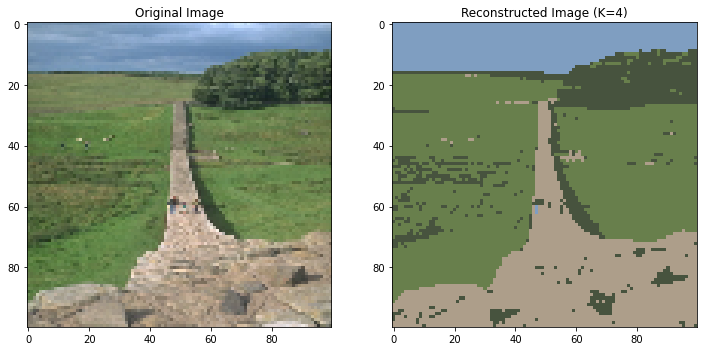

BDE for K=4: inf


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in long_scalars


In [16]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.color import rgb2lab, lab2rgb
from skimage.segmentation import find_boundaries

# Load and preprocess images
def load_and_preprocess_images_kaggle(train_directory, save_directory):
    image_list = []
    for dirname, _, filenames in os.walk(train_directory):
        for filename in filenames:
            # Check for image file extensions
            if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
                image_path = os.path.join(dirname, filename)
                print(f"Loading image: {image_path}")  # Debug print to check image loading
                image = cv2.imread(image_path)
                if image is None:
                    print(f"Failed to load image: {image_path}")  # Debug print to check loading failure
                else:
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image = cv2.resize(image, (100, 100))  # Resize for consistency
                    image_list.append(image)

                    # Save preprocessed image (optional)
                    save_path = os.path.join(save_directory, filename)
                    cv2.imwrite(save_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

    print(f"Loaded {len(image_list)} images.")  # Debug print to check number of images loaded
    return np.array(image_list)

# Function to apply K-Means segmentation
def apply_kmeans(image_reshaped, k,h,w):
    # Apply K-Means clustering to the reshaped image data
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(image_reshaped)

    # Reshape the labels back to the original image shape
    segmented_image = labels.reshape(h, w)
    return segmented_image, kmeans

# Reconstruct the image using clustered labels
def reconstruct_image(kmeans, h, w):
    # Get the centers of the clusters
    cluster_centers = kmeans.cluster_centers_

    # Assign the corresponding cluster center to each pixel
    reconstructed_image = cluster_centers[kmeans.labels_].reshape(h, w, 3)

    # Convert back from Lab color space to RGB
    reconstructed_image_rgb = lab2rgb(reconstructed_image)
    return reconstructed_image_rgb

# Compare segmentation performance using Boundary Displacement Error (BDE)
def compute_bde(segmented_image, ground_truth_image):
    # Get the boundary of the segmented image
    boundary_pred = find_boundaries(segmented_image, mode='thick')

    # Get the boundary of the ground truth image (you need a ground truth for comparison)
    boundary_true = find_boundaries(ground_truth_image, mode='thick')

    # Compute Boundary Displacement Error (BDE)
    bde = np.sum(boundary_pred != boundary_true) / np.sum(boundary_true)
    return bde

# Main process to execute K-Means segmentation and visualization
def main():
    # Path to the training dataset directory
    kaggle_train_directory = '/kaggle/input/berkeley-segmentation-dataset-500-bsds500/images/train'  # Ensure this path is correct
    save_directory = '/kaggle/working/preprocessed_images'

    # Create the directory for preprocessed images
    os.makedirs(save_directory, exist_ok=True)

    # Load and preprocess images
    images = load_and_preprocess_images_kaggle(kaggle_train_directory, save_directory)

    if images.size == 0:
        print("No images were loaded. Please check your dataset path.")
        return

    # Convert image data to Lab color space for clustering
    h, w, c = images[0].shape
    image_lab = rgb2lab(images[0])  # Use the first image as an example

    # Reshape the image for clustering (flatten the image into 2D)
    image_reshaped = image_lab.reshape((h * w, c))

    # Apply K-Means clustering (example with K=4)
    k = 4
    segmented_image, kmeans = apply_kmeans(image_reshaped, k,h,w)

    # Reconstruct the image from clustered labels
    reconstructed_image_rgb = reconstruct_image(kmeans, h, w)

    # Display the original and segmented image
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(images[0])
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_image_rgb)
    plt.title(f"Reconstructed Image (K={k})")

    plt.show()

    # Boundary displacement error (assuming ground truth is available)
    ground_truth_image = np.zeros_like(segmented_image)  # Replace with actual ground truth image
    bde = compute_bde(segmented_image, ground_truth_image)
    print(f"BDE for K={k}: {bde}")

if __name__ == "__main__":
    main()
